In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.preprocessing import *

In [10]:
pose_csv = '../videos/video_1DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(5400, 12)


### original data table

In [12]:
pose_df.head()

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               503.444244  179.512268   
1                                               505.474701  180.638947   
2                                               507.922089  181.237595   
3                                               509.551941  183.430603   
4                                               508.915741  185.188675   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0                1.0    480.764740  162.599014   0.999999   472.167328   
1                1.0    480.941071  161.960007   0.999999   472.390747   
2                1.0    482.481445  162.220001   1.000000   473.431152   
3                1.0    483.548218  162.486053   1.000000   474.408661   
4                1.0    483.243530  162.131683   1.000000   473.631012   

scorer                                                                 \
bodyparts                        right-hindpaw                          
coords              y likelihood             x           y likelihood   
0          180.346436   1.000000    445.113678  150.896912        1.0   
1          180.770386   1.000000    444.398773  150.804886        1.0   
2          180.847366   0.999999    444.163696  151.208450        1.0   
3          180.640793   0.999999    443.752319  151.139023        1.0   
4          181.056885   0.999999    444.121582  151.114059        1.0   

scorer                                                                 \
bodyparts left-hindpaw                          tail-base               
coords               x           y likelihood           x           y   
0           429.323883  193.554947        1.0  403.579498  165.167526   
1           429.061340  193.706314        1.0  402.722046  164.839783   
2           429.458649  193.799454        1.0  403.206573  164.657532   
3           429.378754  193.920746        1.0  403.579956  164.407288   
4           428.306030  194.134430        1.0  403.559753  164.117645   

scorer                
bodyparts             
coords    likelihood  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                1.0

### after removing likelihood and headers

In [15]:
pose[:5, :]

array([[503.44424438, 179.51226807, 480.76473999, 162.59901428,
        472.16732788, 180.34643555, 445.11367798, 150.89691162,
        429.32388306, 193.5549469 , 403.57949829, 165.16752625],
       [505.47470093, 180.63894653, 480.94107056, 161.96000671,
        472.39074707, 180.77038574, 444.39877319, 150.80488586,
        429.06134033, 193.70631409, 402.7220459 , 164.83978271],
       [507.92208862, 181.2375946 , 482.48144531, 162.22000122,
        473.43115234, 180.84736633, 444.16369629, 151.20845032,
        429.45864868, 193.79945374, 403.20657349, 164.65753174],
       [509.55194092, 183.43060303, 483.54821777, 162.48605347,
        474.40866089, 180.64079285, 443.75231934, 151.13902283,
        429.37875366, 193.92074585, 403.57995605, 164.4072876 ],
       [508.91574097, 185.18867493, 483.24353027, 162.13168335,
        473.63101196, 181.05688477, 444.12158203, 151.11405945,
        428.30603027, 194.13442993, 403.55975342, 164.11764526]])

### plot

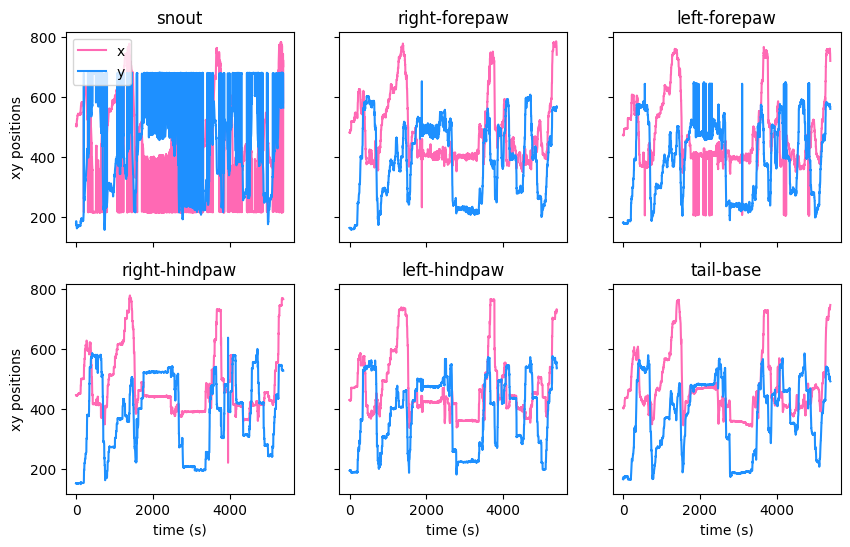

In [22]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [23]:
np.save('../processed_data/pose.npy', pose)